# Olist's Metric Design 

In this challenge, we are going to catch a first glimpse into `Olist's business health`

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
from olist.data import Olist
data = Olist().get_data()

## Test your import!

In [3]:
from nbresult import ChallengeResult

result = ChallengeResult('orders',
    keys_len=len(data),
    key_names=sorted(list(data.keys())),
    reviews_number=len(data['order_reviews'])
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/04-Decision-Science/01-Project-Setup/Optional-Metric-Design
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 3 items

tests/test_orders.py::TestOrders::test_key_names PASSED                  [ 33%]
tests/test_orders.py::TestOrders::test_keys_len PASSED                   [ 66%]
tests/test_orders.py::TestOrders::test_reviews_number PASSED             [100%]

============================== 3 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/orders.pickle

git commit -m 'Completed orders step'

git push origin master


## 1 - Orders vs. Reviews?

❓Plot a histogram of `review_score`. 

<AxesSubplot:ylabel='Frequency'>

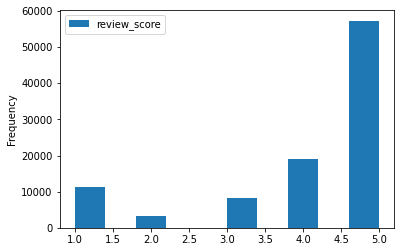

In [6]:
# YOUR CODE HERE
data['order_reviews'][['review_score']].plot.hist()

❓ Plot a histogram of `order_status` <br/>

(array([9.6478e+04, 3.1400e+02, 1.1070e+03, 0.0000e+00, 3.0100e+02,
        6.0900e+02, 0.0000e+00, 6.2500e+02, 5.0000e+00, 2.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

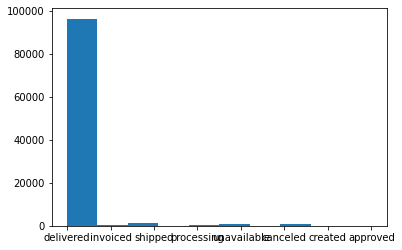

In [14]:
# YOUR CODE HERE
plt.hist('order_status', data = data['orders'])

❓ How many of them are delivered ? shipped ? canceled ? ...

In [19]:
# YOUR CODE HERE
data['orders'].groupby('order_status').count()[['order_id']]

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


💡 We already know - from our data schema - that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

<details>
    <summary><i>▸ Hint</i></summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

In [23]:
# YOUR CODE HERE
order_review_df = data['orders'].merge(data['order_reviews'], how='left', on = 'order_id')
order_review_df['review_score'].isna().sum()

768

If some orders were not reviewed, count and group them per `order_status`.

In [39]:
# YOUR CODE HERE
no_review_df = order_review_df[order_review_df['review_score'].isnull()]

In [88]:
no_review_df.groupby('order_status').count()['order_id']

order_status
canceled        20
created          2
delivered      646
invoiced         5
processing       6
shipped         75
unavailable     14
Name: order_id, dtype: int64

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

1. Which metric would you use as a `key business output metric`for Olist  📈 ? 
2.  Which metric would you use to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric would you use to measure `shipping delay` 🕗?

For each metric, plot a trend line over time.

### Metric 1: Order numbers

❓ Plot the weekly number of total orders per week (to check how business is going)  


In [99]:
# YOUR CODE HERE
import datetime
#data['orders'].loc[1,['order_purchase_timestamp']]
data['orders']['order_purchase_timestamp'] = pd.to_datetime(data['orders']['order_purchase_timestamp'], \
                                                            format="%Y-%m-%d %H:%M:%S")

order_per_week = data['orders'].groupby(pd.Grouper(key='order_purchase_timestamp', freq="W")).count()['order_id']

order_purchase_timestamp
2016-09-04    1
2016-09-11    1
2016-09-18    2
2016-09-25    0
2016-10-02    1
Freq: W-SUN, Name: order_id, dtype: int64

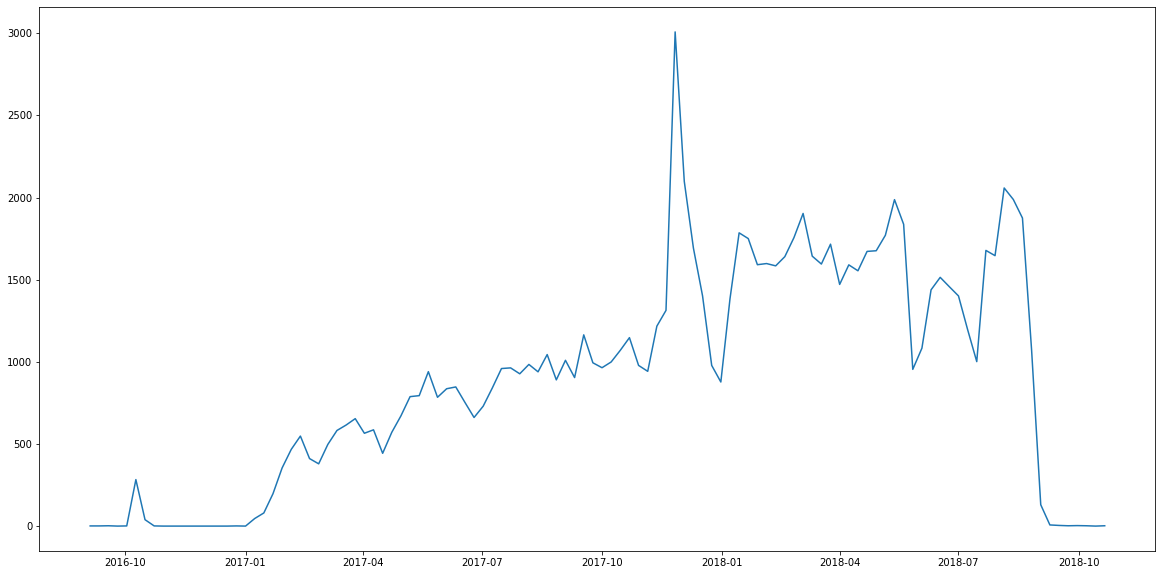

In [108]:
plt.figure(figsize = (20,10))
plt.plot(order_per_week.index,order_per_week)

❓ Visualize the weekly number of non-delivered orders (to check for any potential issues)

<details>
    <summary><i>▸ Hint </i></summary>    
    
* Convert dates to Python `datetime` objects  
* You can use the built-in `pandas.Series.resample() tool from `pandas` to group your dataset by weeks
    
</details>

In [116]:
# YOUR CODE HERE
nonD_per_week = data['orders'][data['orders']['order_status']!='delivered']
nonD_per_week = nonD_per_week.groupby(pd.Grouper(key='order_purchase_timestamp', freq="W")).count()['order_id']

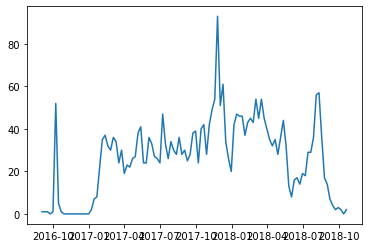

In [117]:
plt.plot(nonD_per_week.index, nonD_per_week)

### Metric 1-bis (optional): Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [137]:
# YOUR CODE HERE
order_payment_df = data['orders'].merge(data['order_payments'], on='order_id', how = 'inner')
reve_per_week = order_payment_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq="1W")).sum('payment_value')['payment_value']

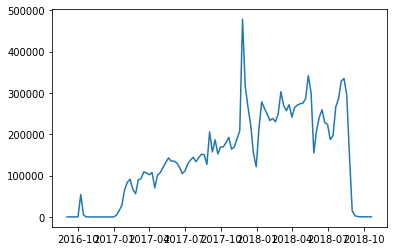

In [138]:
plt.plot(reve_per_week.index, reve_per_week)

💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [190]:
# YOUR CODE HERE
order_payment_df = data['orders'].merge(data['order_payments'], on='order_id', how = 'inner')
order_payment_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_week,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017- 9,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017- 9,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017- 9,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2017- 9,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2017- 9,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017- 9,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2017- 9,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017- 9,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2017- 9,1,credit_card,4,441.16


⌛️ Once again, do not forget to handle datetimes properly

📈 Visualize the number of orders and total amount of payments per week

In [197]:
# YOUR CODE HERE
payment_data_df = order_payment_df.groupby('order_id').sum('payment_value').merge(data['orders'], on = 'order_id', how='inner')

📈 *(Optional)* Plot the weekly number of orders and payments again with techniques you learned during the `Data Visualization` module :)

In [0]:
# YOUR CODE HERE

### Metric 2: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? Use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

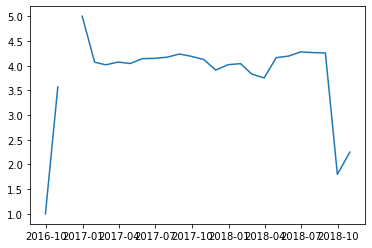

In [224]:
# YOUR CODE HERE
cust_satis = data['orders'].merge(data['order_reviews'], on='order_id', how = 'inner')
cust_satis = cust_satis[['order_purchase_timestamp','order_id','review_score']]
cust_satis = cust_satis.set_index('order_purchase_timestamp')
cust_satis.sort_index()
plt.plot(cust_satis.resample("1M").mean()['review_score'].index,cust_satis.resample("1M").mean()['review_score'] )

⌛️ If you need to handle datetime, do it.

In [0]:
# YOUR CODE HERE

📉 Plot the customer satisfaction evolution over time

In [0]:
# YOUR CODE HERE

📉 *(Optional)* Plot the customer satisfaction evolution over time again with techniques you learned during the Data Visualization module :)

In [0]:
# YOUR CODE HERE

### Metric 3: Shipping delay

❓Create two new metrics, `delay_vs_expected` and `wait_time` in ***days***, from the `orders` dataset, and plot their historical evolution on a weekly basis to detect trends

<details>
    <summary>▸ <i>Hint</i></summary>

    
Ask `StackOverflow` to help you compute differences between `datetime`s in Python!
</details>

🛒 Let's focus on delivered orders so that we can compute the shipping delays:

In [228]:
# YOUR CODE HERE
orders_delivered = data['orders'][data['orders']['order_status']=='delivered']

⌛️ Datetime problems again ? Fix them ;)

In [231]:
# YOUR CODE HERE
orders_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'year_week'],
      dtype='object')

In [235]:
orders_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_delivered['order_purchase_timestamp'])
orders_delivered['order_delivered_customer_date'] = pd.to_datetime(orders_delivered['order_delivered_customer_date'])
orders_delivered['order_estimated_delivery_date'] = pd.to_datetime(orders_delivered['order_estimated_delivery_date'])

/var/folders/yf/53d25rm10gq_l7wdtlp_205w0000gn/T/ipykernel_81176/4051311845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_delivered['order_purchase_timestamp'])
/var/folders/yf/53d25rm10gq_l7wdtlp_205w0000gn/T/ipykernel_81176/4051311845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered['order_delivered_customer_date'] = pd.to_datetime(orders_delivered['order_delivered_customer_date'])
/var/folders/yf/53d25rm10gq_l7

In [241]:
orders_delivered = orders_delivered[['order_id', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]
orders_delivered.head(3)

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04


In [246]:
orders_delivered['delay_vs_expected'] = -(orders_delivered['order_delivered_customer_date'] \
                                        - orders_delivered['order_estimated_delivery_date'])
orders_delivered['wait_time'] = orders_delivered['order_delivered_customer_date'] \
                                        - orders_delivered['order_purchase_timestamp']
orders_delivered.head(3)

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:27:40


👉 Compute the delay between the actual delivery date and the ETA for each order.

In [252]:
# YOUR CODE HERE
import datetime
orders_delivered['delay_vs_expected'] = orders_delivered['delay_vs_expected'].dt.strftime(format = '%d')

AttributeError: 'TimedeltaProperties' object has no attribute 'strftime'

👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [0]:
# YOUR CODE HERE

⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [255]:
# YOUR CODE HERE
len(orders_delivered[orders_delivered['delay_vs_expected']<'0 days'])/len(orders_delivered)

0.08111693857667032

* On average, 8% of the orders are delivered after the ETA ⌛️

* Let's find which weeks were the worst 👇
    1. Aggregate the dataset per week
    2. Compute the percentage of orders delivered lately each week

In [263]:
# YOUR CODE HERE
order_delivered_per_week = orders_delivered.set_index('order_purchase_timestamp').resample("1M").mean()
order_delivered_per_week

/Users/humbert/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
order_purchase_timestamp,,,,
2016-09-30,2016-11-09 07:47:38.000000000,2016-10-04 00:00:00.000000000,-37 days +16:12:22,54 days 19:31:00
2016-10-31,2016-10-26 18:27:39.728301824,2016-12-01 20:17:12.452830208,36 days 01:49:32.724528302,19 days 14:24:48.279245283
2016-11-30,NaT,NaT,NaT,NaT
2016-12-31,2016-12-28 15:54:44.000000000,2017-01-19 00:00:00.000000000,21 days 08:05:16,4 days 16:37:57
2017-01-31,2017-02-04 16:43:30.360000000,2017-03-03 13:24:28.800000000,26 days 20:40:58.440000,12 days 15:31:44.560000
2017-02-28,2017-02-27 01:08:38.123412224,2017-03-17 17:27:59.128856576,18 days 16:19:21.005444646,13 days 04:03:06.501512401
2017-03-31,2017-03-29 18:35:56.936763392,2017-04-10 13:20:52.788688128,11 days 18:44:55.851924587,12 days 22:49:42.339748625
2017-04-30,2017-05-01 14:19:57.629613568,2017-05-14 00:41:53.590968320,12 days 10:21:55.961354754,14 days 22:01:47.640034737
2017-05-31,2017-05-28 01:22:32.926939136,2017-06-10 00:33:42.335025152,12 days 23:05:53.137940761,11 days 07:44:12.161071932


#### 📈 Plot the `number of delays` and `percentage of delayed orders` per week

In [0]:
# YOUR CODE HERE

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

❓ Create a dataframe (with weeks as indexes ) with the following columns:
* number of delays
* number of orders
* percentage of delayed orders

In [0]:
# YOUR CODE HERE

❓ Create sub-dataframes to seperate these weeks into subgroups.

A suggestion:
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less